<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/TopicModelling_on_Legal__Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ''' This would be a long text dataset
This dataset can be downloaded from kaggle,
Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
'''
# Load data
import pandas as pd
input_df=pd.read_csv('/content/legal.csv')
print(input_df.head())

                                           bill_name  ...                                                url
0            barriers  to filling  vacant  positions  ...                                                818
1  2020 Census Grant Program - Establishment and ...  ...  http://mgaleg.maryland.gov/2018RS/bills/sb/sb0...
2                 21st Century School Facilities Act  ...  http://mgaleg.maryland.gov/2018RS/bills/sb/sb1...
3                 21st Century School Facilities Act  ...  http://mgaleg.maryland.gov/2018RS/bills/hb/hb1...
4  9-1-1 Trust Fund - Public Safety Answering Poi...  ...  http://mgaleg.maryland.gov/2018RS/bills/sb/sb1...

[5 rows x 9 columns]


**EDA - Exploratory data analysis**

In [2]:
# Find the shape of the dataset
input_df.shape

(2987, 9)

In [3]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bill_name        2987 non-null   object
 1   bill_number      2987 non-null   object
 2   broad_subjects   2987 non-null   object
 3   committee        2987 non-null   object
 4   narrow_subjects  2980 non-null   object
 5   purpose          2983 non-null   object
 6   sponsor          2985 non-null   object
 7   status           2985 non-null   object
 8   url              2985 non-null   object
dtypes: object(9)
memory usage: 210.1+ KB


In [4]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

bill_name          0
bill_number        0
broad_subjects     0
committee          0
narrow_subjects    7
purpose            4
sponsor            2
status             2
url                2
dtype: int64


In [5]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['purpose'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df

#data cleaning for Labels
input_df['labels'] = input_df['committee'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['labels'] = input_df['labels'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,bill_name,bill_number,broad_subjects,committee,narrow_subjects,purpose,sponsor,status,url,cleaned_data,labels
0,barriers to filling vacant positions,including hiring standards,excessive turnover expectancy,or inadequate compensation. The report sh...,and levels reexamination of hiring requireme...,2018,and the budget committees shall have 45...,turnover of F10A02.02 Division of Employee B...,818,,or inadequate compensation the report should i...
1,2020 Census Grant Program - Establishment and ...,"SB0855,(CH0018)",Elections,"Budget and Taxation,Appropriations","Appropriations,Census -see also- Data; Demogra...",FOR the purpose of establishing the 2020...,Senator Guzzone,"Enacted under Article II, Section 17(b) of the...",http://mgaleg.maryland.gov/2018RS/bills/sb/sb0...,purpose establishing census grant program cert...,budget and taxation appropriations
2,21st Century School Facilities Act,SB1243,"Primary and Secondary Education,Capital Budget...",Budget and Taxation,Administrative Agencies -see also- Electronic ...,FOR the purpose of requiring a county board of...,Senator DeGrange,In the Senate - Hearing 3/15 at 1:45 p.m.,http://mgaleg.maryland.gov/2018RS/bills/sb/sb1...,purpose requiring county board education submi...,budget and taxation
3,21st Century School Facilities Act,"HB1783,(CH0014)","Primary and Secondary Education,Capital Budget...","Appropriations,Budget and Taxation",Administrative Agencies -see also- Electronic ...,FOR the purpose of requiring a county board of...,Delegate Jones,Gubernatorial Veto Override - Chapter 14,http://mgaleg.maryland.gov/2018RS/bills/hb/hb1...,purpose requiring county board education submi...,appropriations budget and taxation
4,9-1-1 Trust Fund - Public Safety Answering Poi...,SB1052,"Public Safety,State Government - Procurement",Finance,"Emergencies,Privacy,Reports,Revenue and Taxes ...",FOR the purpose of prohibiting a director of a...,Senator Kagan,In the Senate - Hearing 3/13 at 1:00 p.m.,http://mgaleg.maryland.gov/2018RS/bills/sb/sb1...,purpose prohibiting director certain public sa...,finance
...,...,...,...,...,...,...,...,...,...,...,...
2982,Workgroup to Study Adopting the Uniform Voidab...,HB1487,Commercial Law - Generally,Economic Matters,Committees and Commissions -see also- Politica...,FOR the purpose of establishing the Workgroup ...,Delegate McComas,In the House - Unfavorable Report by Economic ...,http://mgaleg.maryland.gov/2018RS/bills/hb/hb1...,purpose establishing workgroup study adopting ...,economic matters
2983,Workgroup to Study Design Industry Impacts in ...,HB1471,Economic and Community Development,Economic Matters,"Advertising,Art, Music and Cultural Affairs -s...",FOR the purpose of establishing the Work...,"Delegate Washington, M.",In the House - Unfavorable Report by Economic ...,http://mgaleg.maryland.gov/2018RS/bills/hb/hb1...,purpose establishing workgroup study design in...,economic matters
2984,Youth Sports Programs - Concussion Risk and Ma...,HB0552,"Primary and Secondary Education,Public Health",Ways and Means,Education -see also- Driver Ed; Higher Ed; Spe...,FOR the purpose of requiring the State ...,Delegate Hill,In the House - Hearing 2/15 at 1:00 p.m.,http://mgaleg.maryland.gov/2018RS/bills/hb/hb0...,purpose requiring state department education e...,ways and means
2985,Youth Sports Programs - Concussion Risk and Ma...,SB0840,"Primary and Secondary Education,Public Health","Education, Health, and Environmental Affairs,F...",Education -see also- Driver Ed; Higher Ed; Spe...,FOR the purpose of requiring the State ...,Senator Smith,In the Senate - Unfavorable Report by Educatio...,http://mgaleg.maryland.gov/2018RS/bills/sb/sb0...,purpose requiring state department education e...,education health and environmental affairs fin...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [7]:
import sys
sys.path.insert(1,'/content/')

**LDA- TEXT MODELLING**

In [8]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,health,744.2,requiring,1121.4,requiring,1168.7,relating,502.6,requiring,758.0,program,388.7,license,879.1,loan,909.1,baltimore,379.2,requiring,1190.3
1,maryland,368.1,commission,650.5,county,761.3,person,445.2,property,492.7,county,375.0,county,275.3,proceeds,886.1,act,373.2,tax,809.1
2,care,336.4,state,513.6,board,706.6,altering,355.3,circumstances,375.9,relating,302.1,holder,240.1,providing,562.0,providing,344.1,providing,761.8
3,services,297.4,circumstances,432.9,school,582.1,law,319.6,authorizing,279.2,authorizing,293.8,beer,225.1,purposes,321.6,city,313.4,fund,710.4
4,relating,243.2,general,411.4,education,559.4,making,317.4,relating,279.0,requiring,282.9,class,220.1,improvement,315.1,relating,295.7,program,667.5
5,requiring,237.3,providing,349.5,public,390.3,repealing,312.9,time,274.5,local,275.5,alcoholic,193.1,development,311.8,circumstances,163.2,credit,607.3
6,medical,223.5,authorizing,320.7,department,357.7,state,254.0,court,255.2,department,211.2,licenses,189.1,sale,305.0,action,144.6,state,597.1
7,insurance,223.3,prohibiting,272.6,relating,326.8,circumstances,250.2,information,218.9,prince,196.0,beverages,187.1,grant,298.3,civil,144.3,department,549.0
8,providing,196.4,board,246.2,student,311.0,provisions,211.8,vehicle,212.8,george,196.0,board,173.2,bonds,296.1,establishing,139.6,income,548.1
9,service,137.3,assembly,209.3,state,287.3,court,197.4,notice,195.7,circumstances,194.5,relating,172.0,establishing,291.3,authorizing,133.9,maryland,526.2


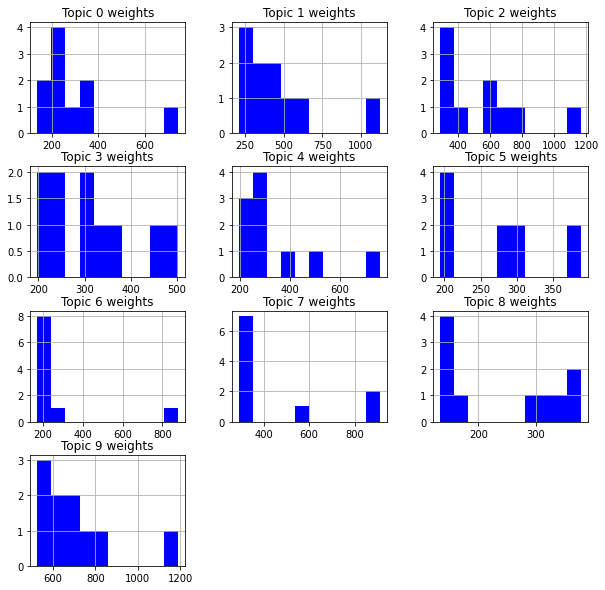

In [9]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'blue')
plt.show(block=False)

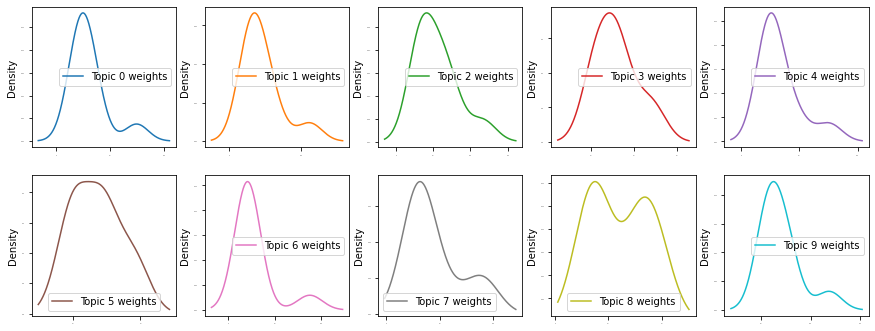

In [10]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

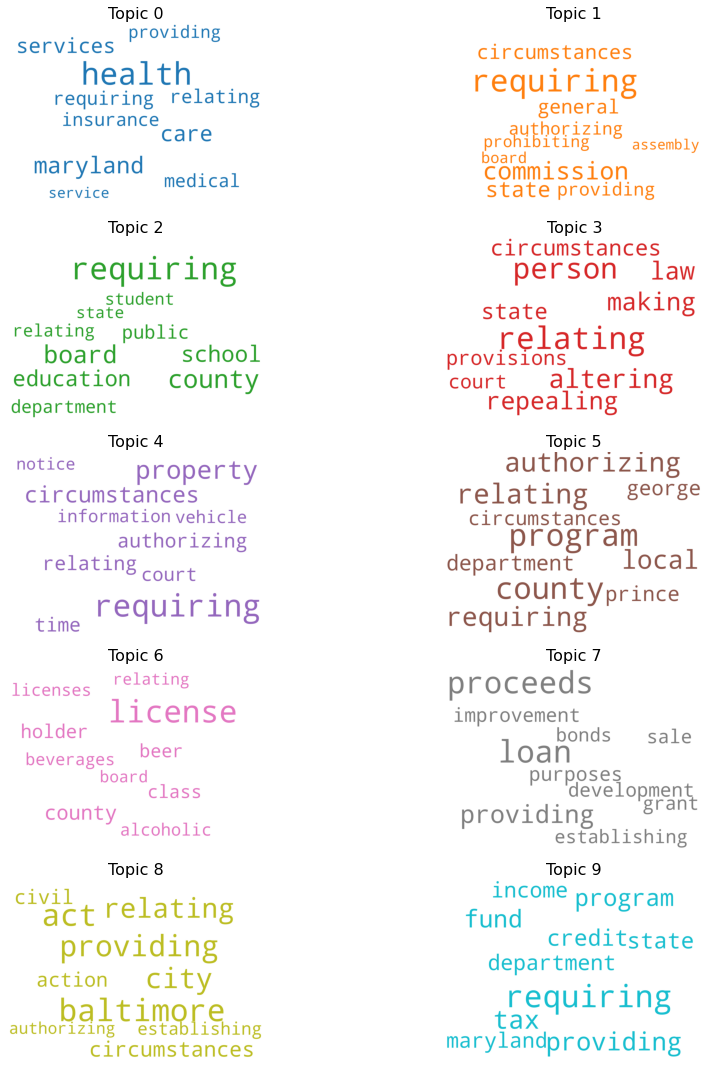

In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA- TEXT MODELLING**

In [12]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,requiring,0.635041,loan,0.376026,county,0.447362,county,0.305980,county,0.451008,license,0.572725,program,0.617931,fund,0.322737,fund,0.485257,state,0.411857,health,0.424865,force,0.396498,person,0.364843,person,0.421200,relating,0.225482,board,0.309638,department,0.303190,general,0.400869,act,0.228691,property,0.284262
1,providing,0.241931,proceeds,0.369672,license,0.421293,board,0.252608,tax,0.380963,fund,0.362522,department,0.269443,requiring,0.223736,person,0.217501,board,0.366943,department,0.355983,task,0.379299,state,0.349371,prohibiting,0.387884,law,0.223446,general,0.272458,city,0.302682,office,0.252137,providing,0.227369,state,0.231638
2,state,0.191827,providing,0.318481,board,0.225981,requiring,0.235187,credit,0.313834,beer,0.211549,authorizing,0.155158,circumstances,0.200974,program,0.193195,department,0.208561,information,0.154059,department,0.180960,department,0.226525,board,0.120006,altering,0.218716,altering,0.167739,baltimore,0.299576,information,0.145969,court,0.172546,city,0.200186
3,authorizing,0.187161,fund,0.165627,circumstances,0.158115,school,0.163422,department,0.187684,class,0.173743,circumstances,0.120419,court,0.178823,relating,0.182746,altering,0.142673,county,0.148106,board,0.178034,prohibiting,0.166699,credit,0.116779,property,0.204619,prohibiting,0.146394,law,0.192177,baltimore,0.113015,relating,0.137790,baltimore,0.188303
4,circumstances,0.182716,board,0.147551,beer,0.136343,fund,0.148705,income,0.180027,holder,0.167760,loan,0.118650,time,0.113858,law,0.165460,school,0.124082,care,0.115636,school,0.117518,general,0.150203,commission,0.100238,baltimore,0.193018,county,0.137728,commission,0.180256,city,0.102519,child,0.126437,providing,0.152063
5,department,0.174853,purposes,0.139485,authorizing,0.123511,program,0.136456,fund,0.171784,wine,0.133706,court,0.112132,credit,0.110319,county,0.154652,repealing,0.096837,fund,0.115514,study,0.112865,assembly,0.092375,requiring,0.097483,city,0.192777,person,0.130213,board,0.175341,assembly,0.099175,office,0.123070,act,0.125182
6,county,0.153632,sale,0.128735,class,0.120899,education,0.124517,property,0.123331,specifying,0.132518,health,0.097063,property,0.102536,act,0.152537,education,0.089859,person,0.084404,recommendations,0.090432,county,0.084707,vehicle,0.097253,repealing,0.186224,office,0.104447,credit,0.144950,system,0.098524,law,0.119093,health,0.111118


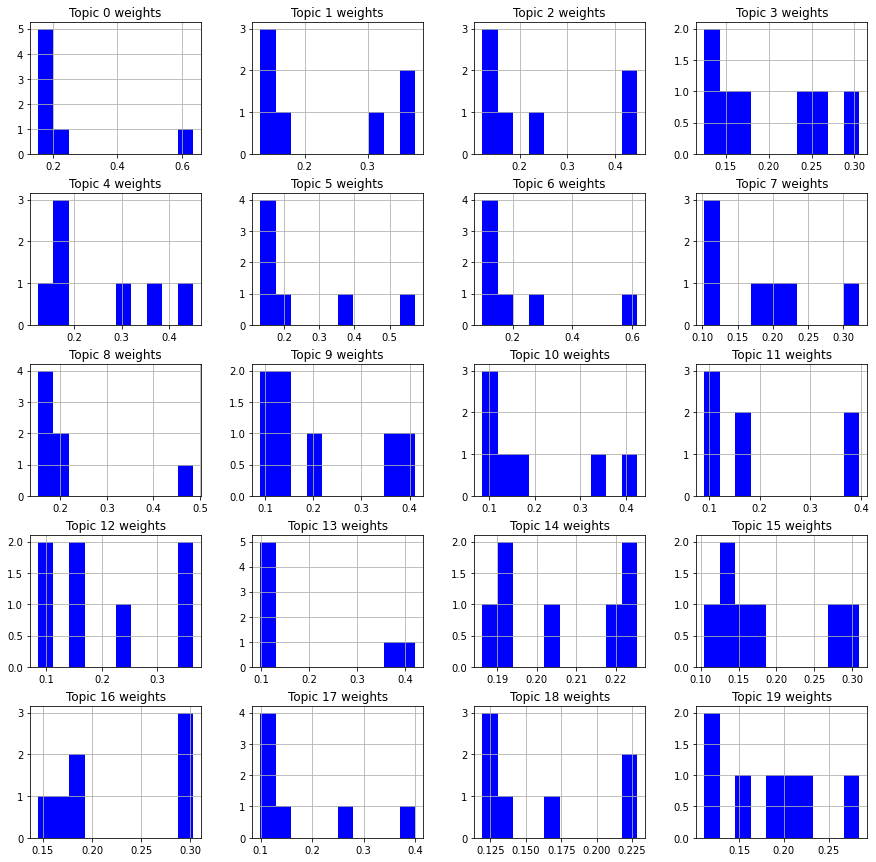

In [13]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'blue')
plt.show(block=False)

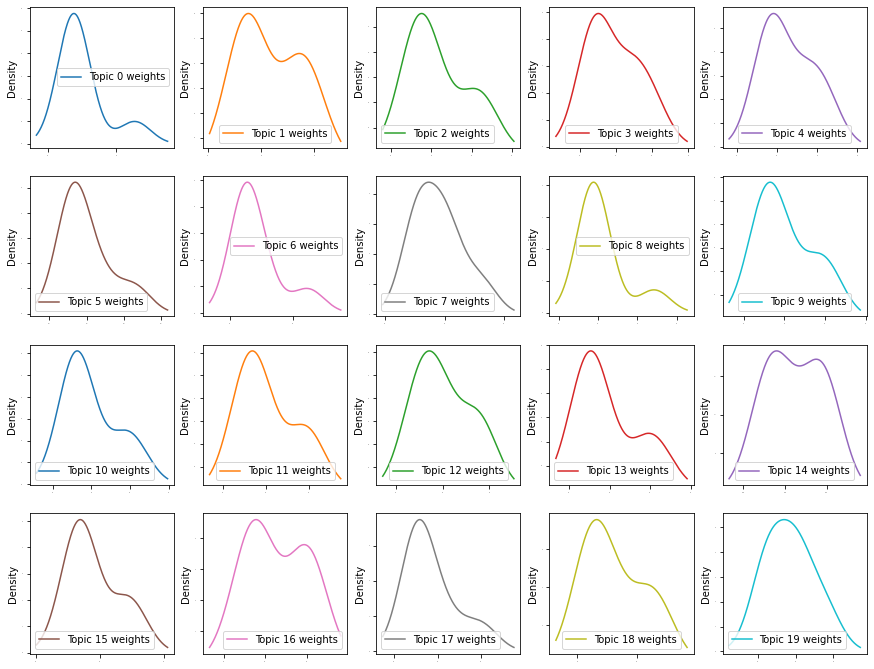

In [14]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

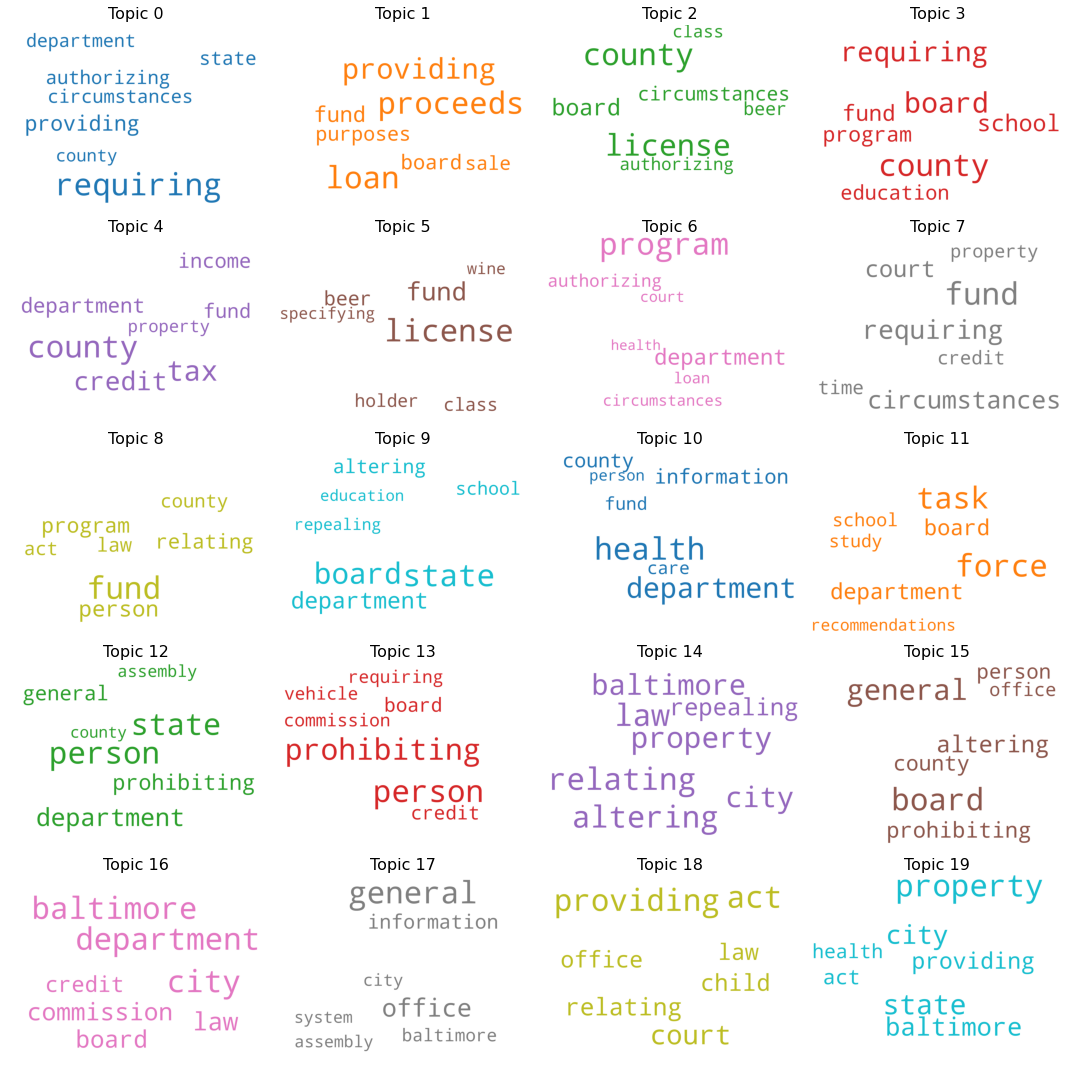

In [15]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**HMM-LDA**

In [20]:
import AlgorithmHMMLDA as HMMLDA

In [23]:
import nltk
import numpy as np
nltk.download('words')
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [24]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[[], ['purpose', 'establishing', 'census', 'grant', 'program', 'certain', 'purpose', 'establishing', 'census', 'grant', 'program', 'panel', 'providing', 'composition', 'chair', 'staffing', 'grant', 'panel', 'prohibiting', 'member', 'grant', 'panel', 'receiving', 'certain', 'compensation', 'authorizing', 'reimbursement', 'certain', 'expenses', 'authorizing', 'local', 'government', 'nonprofit', 'organization', 'apply', 'grant', 'panel', 'certain', 'matching', 'funds', 'certain', 'date', 'requiring', 'grant', 'panel', 'award', 'certain', 'matching', 'funds', 'certain', 'date', 'requiring', 'grant', 'panel', 'notify', 'local', 'governments', 'program', 'expressing', 'intent', 'general', 'assembly', 'local', 'governments', 'provide', 'certain', 'notice', 'certain', 'nonprofit', 'organizations', 'requiring', 'governor', 'include', 'certain', 'appropriation', 'state', 'operating', 'budget', 'certain', 'entity', 'certain', 'fiscal', 'year', 'providing', 'termination', 'act', 'generally', 'rel

In [25]:
n_voca = len(voca)
n_topic = 20
n_class = 20
max_iter = 100
model = HMMLDA.HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [26]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [27]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  certain,first,treasurer,one,decision,commerce,subcontractor,care,support,zoning
Topic 1 :  certain,subject,driver,material,acquire,used,ethics,defendant,combined,wine
Topic 2 :  certain,prohibition,plan,share,person,administer,day,center,offer,establishment
Topic 3 :  market,nutrition,involved,motor,exclusion,credit,obtain,used,motion,higher
Topic 4 :  certain,highway,officer,personal,individual,provider,abuse,request,registration,user
Topic 5 :  certain,statutory,freeze,generating,increasing,allocation,w,modification,eligibility,hearing
Topic 6 :  certain,portfolio,taxable,center,protect,high,sexual,decedent,administrative,account
Topic 7 :  certain,hunting,unspent,higher,lottery,campaign,expenditure,marijuana,motorist,agricultural
Topic 8 :  certain,petition,voting,copy,drug,nonrenewal,city,manner,change,term
Topic 9 :  register,outreach,would,home,credit,exceed,political,party,application,inhuman
Topic 10 :  certain,legal,profile,violation,provision,throughout,defendant,o

**Supervised LDA**

In [ ]:
!pip install pymc

In [29]:
training_data = input_df['cleaned_data'].values

In [30]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

In [31]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [32]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [33]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [34]:
import AlgorithmsupervisedLDA as slda

In [35]:
n_doc = len(corpus)
n_voca = voca.size

In [36]:
n_doc

2975

In [38]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,2975)]

In [39]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [40]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -12.891280114658695 
Topic 4 :	 court,may,law,county,baltimore,act,time,making,city,use
Eta -11.631295810774304 
Topic 1 :	 department,program,date,commission,board,general,maryland,report,assembly,education
Eta -1.534778070992755 
Topic 5 :	 vehicle,health,insurance,act,person,motor,care,administration,drug,making
Eta 1.0736255435950026 
Topic 2 :	 tax,credit,income,property,application,maryland,amount,act,may,department
Eta 1.3833476013915442 
Topic 7 :	 loan,proceeds,sale,force,task,expenditure,creation,disbursement,matching,grantee
Eta 2.888803578597133 
Topic 9 :	 county,board,school,public,education,george,prince,authority,office,general
Eta 3.8263398100731947 
Topic 8 :	 license,county,holder,beer,class,board,alcoholic,wine,permit,business
Eta 4.259382529883697 
Topic 6 :	 practice,corporation,amendment,registration,property,association,body,governing,united,voter
Eta 7.691639775723558 
Topic 0 :	 act,information,department,person,law,time,court,health,report,period
Eta 8.15

**BITERM TOPIC MODELLING**

In [ ]:
!pip install biterm

In [ ]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

 79%|███████▉  | 79/100 [2:09:11<34:06, 97.45s/it]

In [ ]:
topics

In [ ]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))